In [20]:
import pandas as pd

In [22]:
weather = pd.read_csv("weather.csv", index_col="DATE")

In [24]:
weather

,STATION,NAME,ACMC,ACMH,ACSC,ACSH,AWND,FMTM,FRGT,GAHT,...,WT10,WT11,WT13,WT14,WT16,WT18,WT21,WV03,WV07,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,7.38,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-19,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,7.61,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-20,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,8.95,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMC       0.999408
ACMH       0.549488
ACSC       0.998350
ACSH       0.549488
AWND       0.370992
FMTM       0.569580
FRGT       0.999958
GAHT       0.923103
PGTM       0.360376
PRCP       0.000042
PSUN       0.706497
SNOW       0.361179
SNWD       0.364309
TAVG       0.710008
TMAX       0.000042
TMIN       0.000085
TSUN       0.474241
WDF1       0.843034
WDF2       0.527959
WDF5       0.528678
WDFG       0.598976
WDFI       0.872684
WDFM       0.999958
WESD       0.752813
WSF1       0.842991
WSF2       0.527959
WSF5       0.528509
WSFG       0.598976
WSFI       0.872684
WSFM       0.999958
WT01       0.967938
WT02       0.997801
WT03       0.935327
WT04       0.999746
WT05       0.994036
WT06       0.998054
WT07       0.979570
WT08       0.957702
WT09       0.999958
WT10       0.999704
WT11       0.998900
WT13       0.991625
WT14       0.998604
WT16       0.859953
WT18       0.999196
WT21       0.999958
WV03       0.999958
WV07       0.999958


In [28]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [30]:
core_weather.apply(pd.isnull).sum()

precip           1
snow          8539
snow_depth    8613
temp_max         1
temp_min         2
dtype: int64

In [32]:
core_weather["snow"].value_counts()

snow
0.0    15100
0.2        2
0.1        1
Name: count, dtype: int64

In [34]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    15029
Name: count, dtype: int64

In [36]:
del core_weather["snow"]

In [38]:
del core_weather["snow_depth"]

In [40]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
2024-09-22,NaN,NaN,NaN


In [42]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [44]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    1
temp_min    2
dtype: int64

In [46]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
1964-09-14,1.5,92.0,NaN
2024-09-22,0.0,NaN,NaN


In [48]:
core_weather.loc["1964-09-01":"1964-10-01"]

,precip,temp_max,temp_min
DATE,,,
1964-09-01,0.00,98.0,69.0
1964-09-02,0.00,98.0,64.0
1964-09-03,0.00,100.0,64.0
1964-09-04,0.00,103.0,71.0
1964-09-05,0.00,103.0,74.0
1964-09-06,0.00,99.0,75.0
1964-09-07,0.00,98.0,70.0
1964-09-08,0.00,96.0,74.0
1964-09-09,0.01,92.0,73.0


In [50]:
core_weather = core_weather.fillna(method="ffill")

/var/folders/9_/6zhfsf3x4l96yth1stttv9q80000gn/T/ipykernel_49654/3127936549.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [52]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [54]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [56]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17',
       '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22'],
      dtype='object', name='DATE', length=23642)

In [58]:
core_weather.index = pd.to_datetime(core_weather.index)

In [60]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-21', '2024-09-22'],
              dtype='datetime64[ns]', name='DATE', length=23642, freq=None)

In [62]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=23642)

<Axes: xlabel='DATE'>

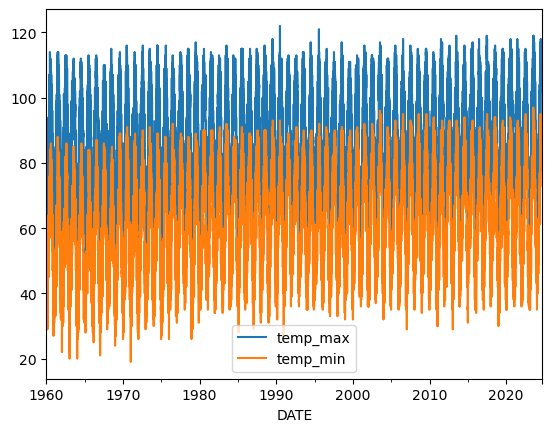

In [64]:
core_weather[["temp_max", "temp_min"]].plot()

In [65]:
core_weather.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2020    366
2021    365
2022    365
2023    365
2024    266
Name: count, Length: 65, dtype: int64

<Axes: xlabel='DATE'>

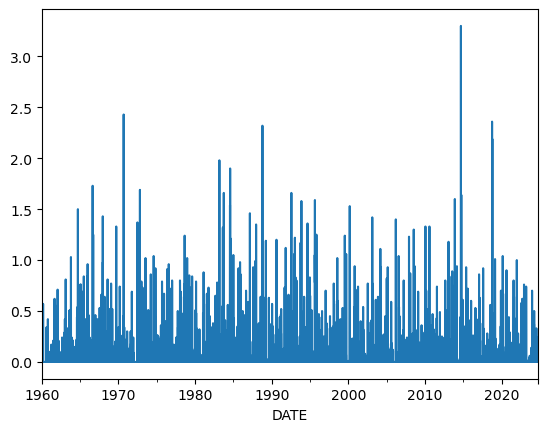

In [66]:
core_weather["precip"].plot()

<Axes: xlabel='DATE'>

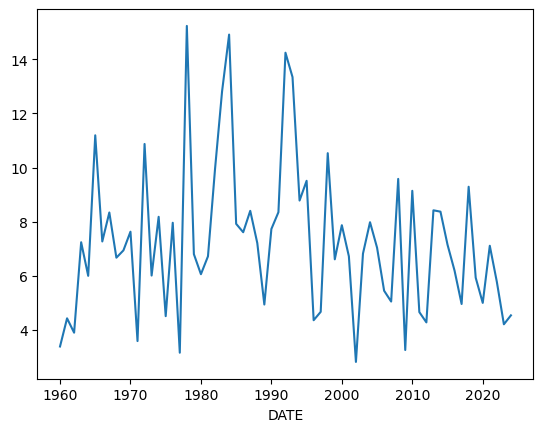

In [67]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [68]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [69]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,48.0,37.0,47.0
1960-01-02,0.0,47.0,30.0,50.0
1960-01-03,0.0,50.0,30.0,52.0
1960-01-04,0.0,52.0,29.0,50.0
1960-01-05,0.0,50.0,30.0,52.0
...,...,...,...,...
2024-09-18,0.0,97.0,73.0,98.0
2024-09-19,0.0,98.0,74.0,97.0
2024-09-20,0.0,97.0,77.0,90.0


In [72]:
core_weather = core_weather.iloc[:-1,:].copy()

In [73]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,48.0,37.0,47.0
1960-01-02,0.0,47.0,30.0,50.0
1960-01-03,0.0,50.0,30.0,52.0
1960-01-04,0.0,52.0,29.0,50.0
1960-01-05,0.0,50.0,30.0,52.0
...,...,...,...,...
2024-09-17,0.0,93.0,78.0,97.0
2024-09-18,0.0,97.0,73.0,98.0
2024-09-19,0.0,98.0,74.0,97.0


In [75]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [82]:
predictors = ["precip", "temp_max", "temp_min"]

In [84]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [86]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,48.0,37.0,47.0
1960-01-02,0.0,47.0,30.0,50.0
1960-01-03,0.0,50.0,30.0,52.0
1960-01-04,0.0,52.0,29.0,50.0
1960-01-05,0.0,50.0,30.0,52.0
...,...,...,...,...
2020-12-27,0.0,71.0,43.0,68.0
2020-12-28,0.0,68.0,50.0,61.0
2020-12-29,0.0,61.0,44.0,65.0


In [88]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.0,65.0,39.0,64.0
2021-01-02,0.0,64.0,40.0,64.0
2021-01-03,0.0,64.0,39.0,69.0
2021-01-04,0.0,69.0,41.0,71.0
2021-01-05,0.0,71.0,43.0,70.0
...,...,...,...,...
2024-09-17,0.0,93.0,78.0,97.0
2024-09-18,0.0,97.0,73.0,98.0
2024-09-19,0.0,98.0,74.0,97.0


In [90]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [92]:
predictions = reg.predict(test[predictors])

In [122]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

21.40025965754386

In [98]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [100]:
combined

,actual,predictions
DATE,,
2021-01-01,64.0,65.766313
2021-01-02,64.0,64.926898
2021-01-03,69.0,64.864806
2021-01-04,71.0,69.496526
2021-01-05,70.0,71.423724
...,...,...
2024-09-17,97.0,93.430095
2024-09-18,98.0,96.725666
2024-09-19,97.0,97.689265


<Axes: xlabel='DATE'>

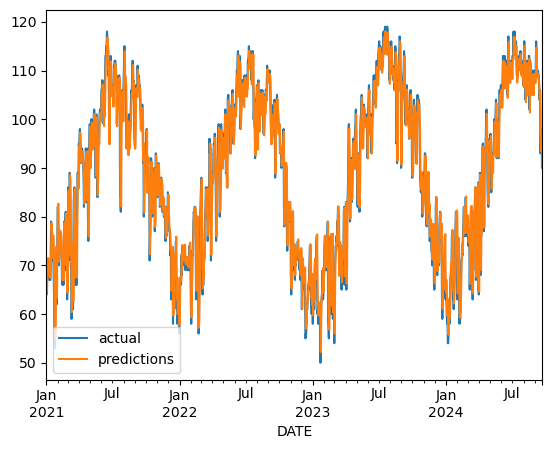

In [102]:
combined.plot()

In [103]:
reg.coef_

array([-2.19661008,  0.90150738,  0.06209165])

In [106]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [108]:
core_weather = core_weather.iloc[30:,:].copy()

In [110]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [112]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-31,0.00,65.0,41.0,66.0,59.133333,0.909744,1.585366
1960-02-01,0.00,66.0,40.0,66.0,59.766667,0.905556,1.650000
1960-02-02,0.03,66.0,48.0,62.0,60.300000,0.913636,1.375000
1960-02-03,0.00,62.0,39.0,64.0,60.633333,0.977957,1.589744
1960-02-04,0.00,64.0,38.0,63.0,61.100000,0.954688,1.684211
...,...,...,...,...,...,...,...
2024-09-17,0.00,93.0,78.0,97.0,108.166667,1.163082,1.192308
2024-09-18,0.00,97.0,73.0,98.0,107.666667,1.109966,1.328767
2024-09-19,0.00,98.0,74.0,97.0,107.200000,1.093878,1.324324


In [114]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]


In [116]:
error, combined = create_predictions(predictors, core_weather, reg)

In [118]:
error

20.397323914884232

<Axes: xlabel='DATE'>

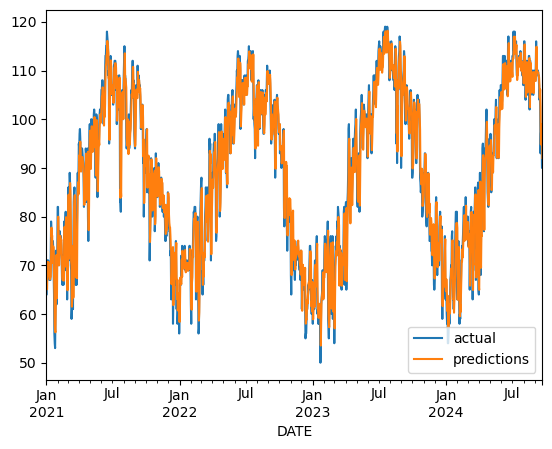

In [120]:
combined.plot()

In [132]:
core_weather["monthly_avg"] = core_weather.groupby(core_weather.index.month)["temp_max"].transform(lambda x: x.expanding().mean())

In [134]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,65.0,41.0,66.0,59.133333,0.909744,1.585366,65.000000
1960-02-01,0.00,66.0,40.0,66.0,59.766667,0.905556,1.650000,66.000000
1960-02-02,0.03,66.0,48.0,62.0,60.300000,0.913636,1.375000,66.000000
1960-02-03,0.00,62.0,39.0,64.0,60.633333,0.977957,1.589744,64.666667
1960-02-04,0.00,64.0,38.0,63.0,61.100000,0.954688,1.684211,64.500000
...,...,...,...,...,...,...,...,...
2024-09-17,0.00,93.0,78.0,97.0,108.166667,1.163082,1.192308,99.574084
2024-09-18,0.00,97.0,73.0,98.0,107.666667,1.109966,1.328767,99.572755
2024-09-19,0.00,98.0,74.0,97.0,107.200000,1.093878,1.324324,99.571944


In [138]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).transform(lambda x: x.expanding(1).mean())

In [ ]:
predictors = ["precip", "temp_max", "temp_min", "month_max","month_day_max", "max_min","day_of_year_avg","monthly_avg"]


In [140]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)

In [144]:
error

19.07825577834488

In [154]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [148]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2021-07-22,83.0,105.437624,22.437624
2024-03-30,65.0,85.453771,20.453771
2023-02-12,59.0,77.357147,18.357147
2023-04-03,65.0,83.151710,18.151710
2023-08-31,90.0,108.124992,18.124992
2021-10-11,71.0,88.834993,17.834993
2023-02-25,59.0,75.017335,16.017335
2024-04-04,72.0,88.014125,16.014125
2021-09-25,80.0,95.903052,15.903052
